<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/emotion_recognition_presidential_debate.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/emotion_recognition_presidential_debate.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/emotion_recognition_presidential_debate.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/emotion_recognition_presidential_debate.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


# Emotion Recognition for 2020 Presidential Debates

This example follows along with [this blog post](https://medium.com/voxel51/computer-vision-tells-us-how-the-presidential-candidates-really-feel-5db463167689) analyzing the presidential and vice-presidential debates.

## Download dataset

You can download a dataset of images and labels from the debate used in the blog post from [this Google Drive link (958MB)](https://drive.google.com/file/d/1Eg3eryS2OPJNjrLsWTU6hfU8ghWMFjsZ).

For reference, the videos in this dataset were taken from:
- https://www.youtube.com/watch?v=wW1lY5jFNcQ,
- https://www.youtube.com/watch?v=t_G0ia3JOVs

And the emotion recognition model used is from https://github.com/justinshenk/fer.

## Setup

If you haven't already, install FiftyOne:

In [ ]:
!pip install fiftyone

In [ ]:
import fiftyone as fo

If the above import fails, run the following two commands. There is [currently an issue](https://github.com/voxel51/fiftyone/issues/1494) with OpenCV in Colab environments.

In [ ]:
# If the FiftyOne import failed, restart the runtime by running this cell
exit()

In [ ]:
# If the FiftyOne import failed
!pip install opencv-python-headless==4.5.4.60

import fiftyone as fo

## Load data into FiftyOne

Let's load the dataset into FiftyOne:

In [9]:
import fiftyone as fo
from fiftyone import ViewField as F

In [ ]:
# The path to the unzipped dataset on disk
DATASET_PATH = "/path/to/debate_images"

In [3]:
dataset = fo.Dataset.from_dir(DATASET_PATH, dataset_type=fo.types.FiftyOneDataset)

 100% |███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11892/11892 [1.7m elapsed, 0s remaining, 113.4 samples/s]      


In [6]:
# View the dataset in the App
session = fo.launch_app(dataset)

App launched


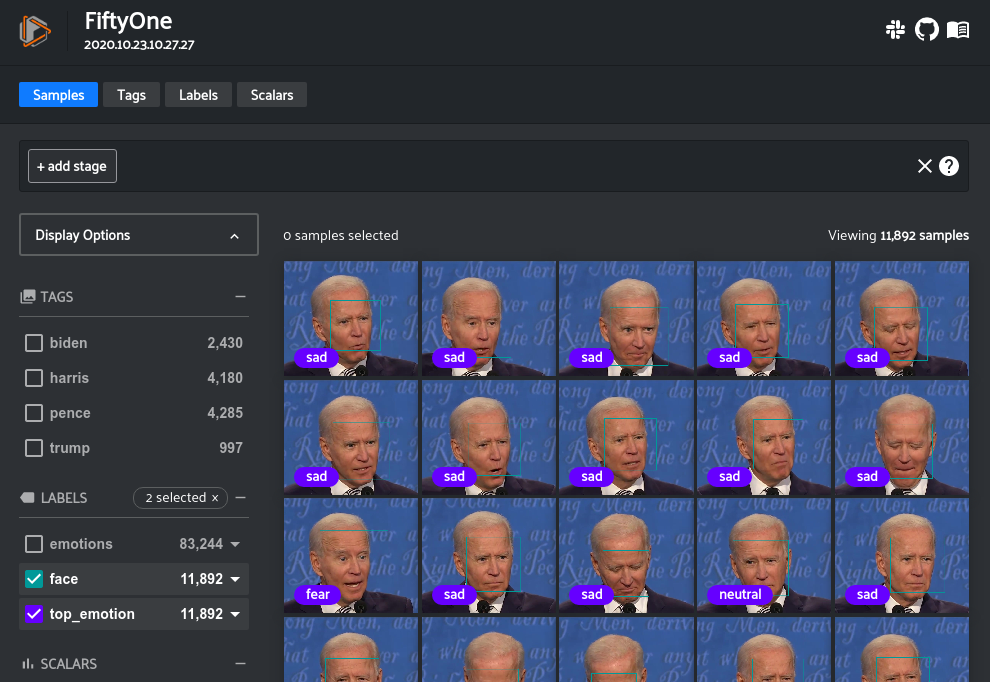

## Explore the dataset

With the data loaded into FiftyOne, you can [use the App's features](https://voxel51.com/docs/fiftyone/user_guide/app.html) to visually explore the dataset. You can also [construct views into the dataset](https://voxel51.com/docs/fiftyone/user_guide/using_views.html) programmatically to identify particular samples of interest.

For example, each image is tagged with the corresponding speaker. Let's filter the samples in the dataset to find only those of Biden speaking, and visualze the distribution of his emotions in the Labels tab:

In [7]:
# Only show images where Biden is speaking
session.view = dataset.match_tags("biden")

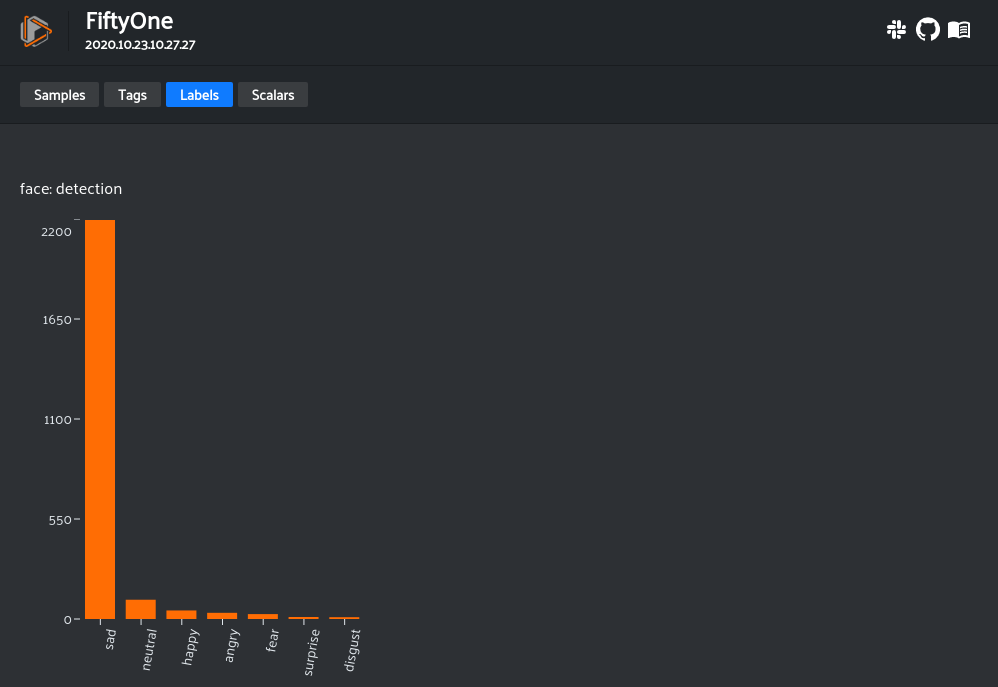

In [10]:
# Show examples where Trump is happy
session.view = dataset.match_tag("trump").match(F("top_emotion.label") == "happy")

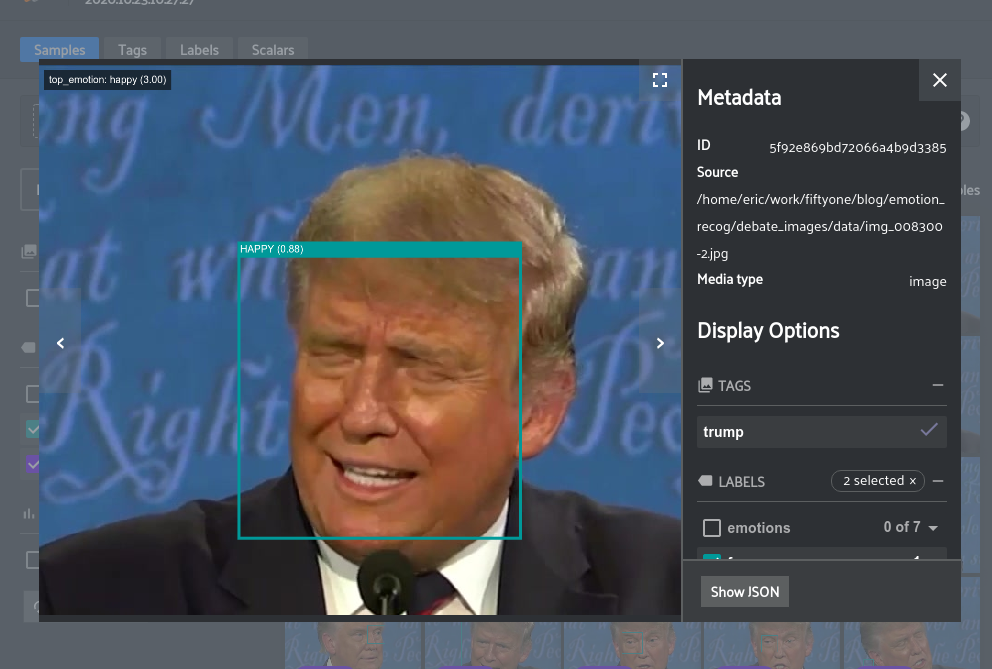